Loaded image: roses.jpg


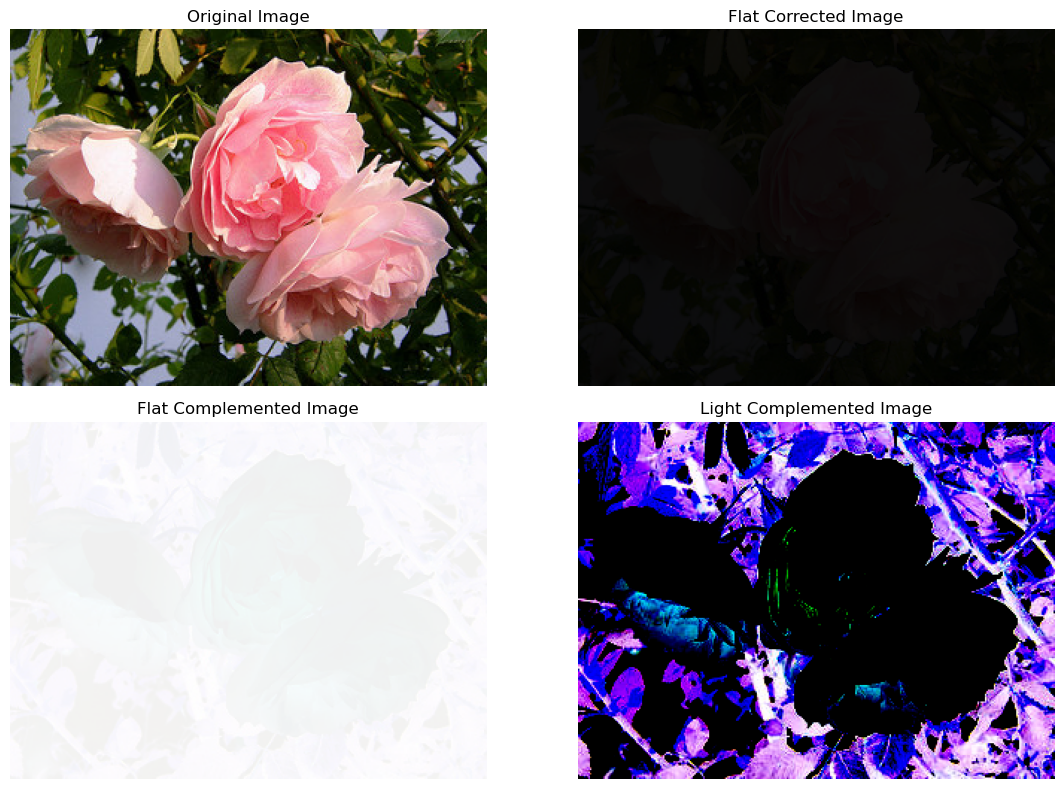

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to load image from the 'data/images' folder
def load_image_from_folder(folder_path='data/images', image_name='roses.jpg'):
    """
    Load a specific image from the given folder.
    """
    try:
        # Build the image path
        image_path = os.path.join(folder_path, image_name)

        # Check if the image file exists
        if not os.path.exists(image_path):
            print(f"Error: Image {image_name} not found in folder {folder_path}.")
            return None

        # Read the image using OpenCV
        image = cv2.imread(image_path)

        if image is None:
            print(f"Error: Could not load image {image_name}.")
            return None
        else:
            print(f"Loaded image: {image_name}")
            return image

    except Exception as e:
        print(f"Error loading image from folder: {e}")
        return None

# Load the 'roses.jpg' image
image = load_image_from_folder(folder_path='data/images', image_name='roses.jpg')

# Check if the image is loaded correctly
if image is not None:
    # Apply tonal corrections (flat, light, dark)
    flat_image = apply_tonal_correction(image, 'flat')  # Correct contrast to make the image more neutral.
    light_image = apply_tonal_correction(image, 'light')  # Lighten the image using a power-law transformation.
    dark_image = apply_tonal_correction(image, 'dark')  # Darken the image using a power-law transformation.

    # Apply color balancing to the dark-corrected image
    balanced_image = apply_color_balance(dark_image, red_factor=0.9, green_factor=1.1, blue_factor=1.0)

    # Compute the complements (inverses) of the processed images
    flat_complement = get_complement(flat_image)  # Get complement of the flat-corrected image
    light_complement = get_complement(light_image)  # Get complement of the light-corrected image
    dark_complement = get_complement(dark_image)  # Get complement of the dark-corrected image
    balanced_complement = get_complement(balanced_image)  # Get complement of the color-balanced image

    # Plot original and complemented images in two columns
    plt.figure(figsize=(12, 8))  # Increase size for better visibility

    # Display the original and corrected images in two columns
    # Column 1: Original & Processed Images
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(2, 2, 2)
    if flat_image is not None:
        plt.imshow(flat_image)
        plt.title("Flat Corrected Image")
    plt.axis('off')

    # Column 2: Complemented Images
    plt.subplot(2, 2, 3)
    if flat_complement is not None:
        plt.imshow(flat_complement)
        plt.title("Flat Complemented Image")
    plt.axis('off')

    plt.subplot(2, 2, 4)
    if light_complement is not None:
        plt.imshow(light_complement)
        plt.title("Light Complemented Image")
    plt.axis('off')

    plt.tight_layout()
    plt.show()